<a href="https://colab.research.google.com/github/DanielCalimayor/DS-Unit-2-Regression-2/blob/master/Daniel_Calimayor_permutation_importances_partial_dependence_plots_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install eli5 pdpbox category_encoders

In [0]:
 # from google.colab import files
 # files.upload()

In [3]:
 !unzip caterpillar-tube-pricing.zip

Archive:  caterpillar-tube-pricing.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: sample_submission.csv   
replace data.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: data.zip                


In [4]:
 !unzip data.zip

Archive:  data.zip
replace competition_data/bill_of_materials.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.csv 

In [5]:
from glob import glob
import pandas as pd

def search_column(name):
    for path in glob('competition_data/*.csv'):
        df = pd.read_csv(path)
        if name in df.columns:
            print(path, df.shape)
            print(df.columns.tolist(), '\n')
search_column('thickness')

competition_data/comp_elbow.csv (178, 16)
['component_id', 'component_type_id', 'bolt_pattern_long', 'bolt_pattern_wide', 'extension_length', 'overall_length', 'thickness', 'drop_length', 'elbow_angle', 'mj_class_code', 'mj_plug_class_code', 'plug_diameter', 'groove', 'unique_feature', 'orientation', 'weight'] 

competition_data/comp_tee.csv (4, 14)
['component_id', 'component_type_id', 'bolt_pattern_long', 'bolt_pattern_wide', 'extension_length', 'overall_length', 'thickness', 'drop_length', 'mj_class_code', 'mj_plug_class_code', 'groove', 'unique_feature', 'orientation', 'weight'] 

competition_data/comp_straight.csv (361, 12)
['component_id', 'component_type_id', 'bolt_pattern_long', 'bolt_pattern_wide', 'head_diameter', 'overall_length', 'thickness', 'mj_class_code', 'groove', 'unique_feature', 'orientation', 'weight'] 

competition_data/comp_float.csv (16, 7)
['component_id', 'component_type_id', 'bolt_pattern_long', 'bolt_pattern_wide', 'thickness', 'orientation', 'weight'] 



In [6]:
import pandas as pd
mats = pd.read_csv('competition_data/bill_of_materials.csv')

ac = mats.melt(id_vars='tube_assembly_id', 
                                     value_vars=[f'component_id_{n}' for n in range(1,9)])

ac = (ac
                       .sort_values(by='tube_assembly_id')
                       .dropna()
                       .rename(columns={'value': 'component_id'}))

ac.head(10)

,tube_assembly_id,variable,component_id
0,TA-00001,component_id_1,C-1622
21198,TA-00001,component_id_2,C-1629
1,TA-00002,component_id_1,C-1312
2,TA-00003,component_id_1,C-1312
3,TA-00004,component_id_1,C-1312
4,TA-00005,component_id_1,C-1624
42400,TA-00005,component_id_3,C-1641
21202,TA-00005,component_id_2,C-1631
5,TA-00006,component_id_1,C-1624
21203,TA-00006,component_id_2,C-1631


In [7]:
comp = pd.read_csv('competition_data/components.csv')
act = ac.merge(comp, how='left')
act.head(3)

,tube_assembly_id,variable,component_id,name,component_type_id
0,TA-00001,component_id_1,C-1622,NUT-SWIVEL,CP-025
1,TA-00001,component_id_2,C-1629,SLEEVE-ORFS,CP-024
2,TA-00002,component_id_1,C-1312,NUT-FLARED,CP-028


In [8]:
table = pd.crosstab(act['tube_assembly_id'], 
                    act['component_type_id'])

table = table.reset_index()
table.columns.name = ''
print(table.shape)
table.head()

(19149, 30)


,tube_assembly_id,CP-001,CP-002,CP-003,CP-004,CP-005,CP-006,CP-007,CP-008,CP-009,CP-010,CP-011,CP-012,CP-014,CP-015,CP-016,CP-017,CP-018,CP-019,CP-020,CP-021,CP-022,CP-023,CP-024,CP-025,CP-026,CP-027,CP-028,CP-029,OTHER
0,TA-00001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,TA-00002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,TA-00003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,TA-00004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,TA-00005,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [9]:
comp_float = pd.read_csv('competition_data/comp_float.csv')
comp_float['thickness'].value_counts()

22.00    3
28.00    3
25.40    2
15.70    1
15.85    1
36.00    1
14.20    1
36.50    1
25.00    1
20.00    1
18.00    1
Name: thickness, dtype: int64

In [10]:
comp_float.head()

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,thickness,orientation,weight
0,C-0027,CP-021,148.00,96.00,18.00,Yes,2.230
1,C-0454,CP-022,58.72,30.18,28.00,No,0.590
2,C-0455,CP-022,58.72,30.18,28.00,No,0.525
3,C-0494,CP-022,52.40,26.20,15.85,No,0.230
4,C-0496,CP-022,58.80,30.20,14.20,No,0.284


In [11]:
comp_float['weight']

0     2.230
1     0.590
2     0.525
3     0.230
4     0.284
5     1.144
6     0.447
7     1.983
8     0.465
9     2.565
10    4.060
11    1.880
12    0.783
13    0.276
14    0.389
15    0.516
Name: weight, dtype: float64

In [12]:
comp_float.head()

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,thickness,orientation,weight
0,C-0027,CP-021,148.00,96.00,18.00,Yes,2.230
1,C-0454,CP-022,58.72,30.18,28.00,No,0.590
2,C-0455,CP-022,58.72,30.18,28.00,No,0.525
3,C-0494,CP-022,52.40,26.20,15.85,No,0.230
4,C-0496,CP-022,58.80,30.20,14.20,No,0.284


In [0]:
comp = pd.concat((pd.read_csv(path) for path in glob('competition_data/comp_*.csv')), sort=False)
columns = ['component_id', 'component_type_id', 'orientation', 'unique_feature', 'weight']
comp = comp[columns]
comp['orientation'] = (comp['orientation']=='Yes').astype(int)
comp['unique_feature'] = (comp['unique_feature']=='Yes').astype(int)
comp['weight'] = comp['weight'].fillna(comp['weight'].median())

In [14]:
comp.head()

,component_id,component_type_id,orientation,unique_feature,weight
0,C-1621,CP-025,0,0,0.015
1,C-1624,CP-025,0,0,0.035
2,C-1623,CP-025,0,0,0.044
3,C-1622,CP-025,0,0,0.036
4,C-1625,CP-025,0,0,0.129


In [15]:
mats.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
comp_float.head()

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,thickness,orientation,weight
0,C-0027,CP-021,148.00,96.00,18.00,Yes,2.230
1,C-0454,CP-022,58.72,30.18,28.00,No,0.590
2,C-0455,CP-022,58.72,30.18,28.00,No,0.525
3,C-0494,CP-022,52.40,26.20,15.85,No,0.230
4,C-0496,CP-022,58.80,30.20,14.20,No,0.284


In [21]:
comp_float['bolt_pattern_area'] = (comp_float[f'bolt_pattern_long']/ comp_float[f'bolt_pattern_wide'].fillna(0))
comp_float['bolt_pattern_long'] = (comp_float[f'bolt_pattern_long'].fillna(0)) 
comp_float['bolt_pattern_wide'] = (comp_float[f'bolt_pattern_wide'].fillna(0))
comp_float['thickness'] = (comp_float[f'thickness'].fillna(0))



comp_float = comp_float.merge(comp, left_on=f'component_id', right_on='component_id',how='left')

for col in comp_float:
    if 'orientation' in col or 'weight' in col:
        comp_float[col] = comp_float[col].fillna(0)
        
comp_float['orientation'] = (comp_float['orientation'])
comp_float['weight'] = (comp_float['weight'])
comp_float['bolt_pattern_area'] = (comp_float[f'bolt_pattern_long']/ comp_float[f'bolt_pattern_wide'])

features = ['component_id',	'bolt_pattern_long',	'bolt_pattern_wide',
            'thickness',	'orientation',	'weight']
comp_float = comp_float[features]
print(comp_float.shape)
comp_float.head()

(2047, 6)


,component_id,bolt_pattern_long,bolt_pattern_wide,thickness,orientation,weight
0,C-0027,148.00,96.00,18.00,1,2.230
1,C-0454,58.72,30.18,28.00,0,0.590
2,C-0455,58.72,30.18,28.00,0,0.525
3,C-0494,52.40,26.20,15.85,0,0.230
4,C-0496,58.80,30.20,14.20,0,0.284


In [60]:
mats['components_total'] = sum(mats[f'quantity_{n}'].fillna(0)  for n in range(1,9))
mats['components_distinct'] = sum(mats[f'component_id_{n}'].notnull().astype(int) for n in range(1,9))
mats['weight'] = 0

for n in range(1,9):
    mats = mats.merge(comp, left_on=f'component_id_{n}', right_on='component_id', 
                                how='left', suffixes=('', f'_{n}'))

for col in mats:
    if 'orientation' in col or 'unique_feature' in col or 'weight' in col:
        mats[col] = mats[col].fillna(0)
        
mats['orientation'] = sum(mats[f'orientation_{n}'] for n in range(1,9))
mats['unique_feature'] = sum(mats[f'unique_feature_{n}'] for n in range(1,9))
materials['weight'] = sum(mats[f'weight_{n}'] for n in range(1,9))

features = ['tube_assembly_id', 'orientation', 'unique_feature', 'weight', 
            'components_total', 'components_distinct', 'component_id_1']
mats = mats[features]
print(mats.shape)
mats.head()

TypeError: ignored

In [23]:
tube = pd.read_csv('competition_data/tube.csv')
tube.head()

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42)
train = trainval[trainval.tube_assembly_id.isin(train_tube_assemblies)]
val = trainval[trainval.tube_assembly_id.isin(val_tube_assemblies)]

def clean(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    X = (X.merge(table, how='left')
         .merge(mats, how='left')
         .merge(tube, how='left')
         .fillna(0))
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    return X

train = clean(train)
val = clean(val)
test = clean(test)

In [0]:
import numpy as np

target = 'cost'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = test.drop(columns='id')
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [28]:
import category_encoders as ce
from xgboost import XGBRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
eval_set = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]
model = XGBRegressor(n_estimators=2000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log, 
          eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=50)

[15:25:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.71923	validation_1-rmse:1.70792
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1.56502	validation_1-rmse:1.55432
[2]	validation_0-rmse:1.42775	validation_1-rmse:1.41736
[3]	validation_0-rmse:1.30336	validation_1-rmse:1.2934
[4]	validation_0-rmse:1.1916	validation_1-rmse:1.18282
[5]	validation_0-rmse:1.09323	validation_1-rmse:1.08436
[6]	validation_0-rmse:1.00509	validation_1-rmse:0.997156
[7]	validation_0-rmse:0.928291	validation_1-rmse:0.923293
[8]	validation_0-rmse:0.860002	validation_1-rmse:0.855603
[9]	validation_0-rmse:0.798704	validation_1-rmse:0.794723
[10]	validation_0-rmse:0.746026	validation_1-rmse:0.744567
[11]	validation_0-rmse:0.700023	validation_1-rmse:0.700509
[12]	validation_0-rmse:0.658637

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
def generate_submission(estimator, X_test, filename):
    y_pred_log = estimator.predict(X_test)
    y_pred = np.expm1(y_pred_log) 
    submission = pd.read_csv('sample_submission.csv')
    submission['cost'] = y_pred
    submission.to_csv(filename, index=False)
    
X_test_encoded = encoder.transform(X_test)
generate_submission(model, X_test_encoded, 'submission.csv')

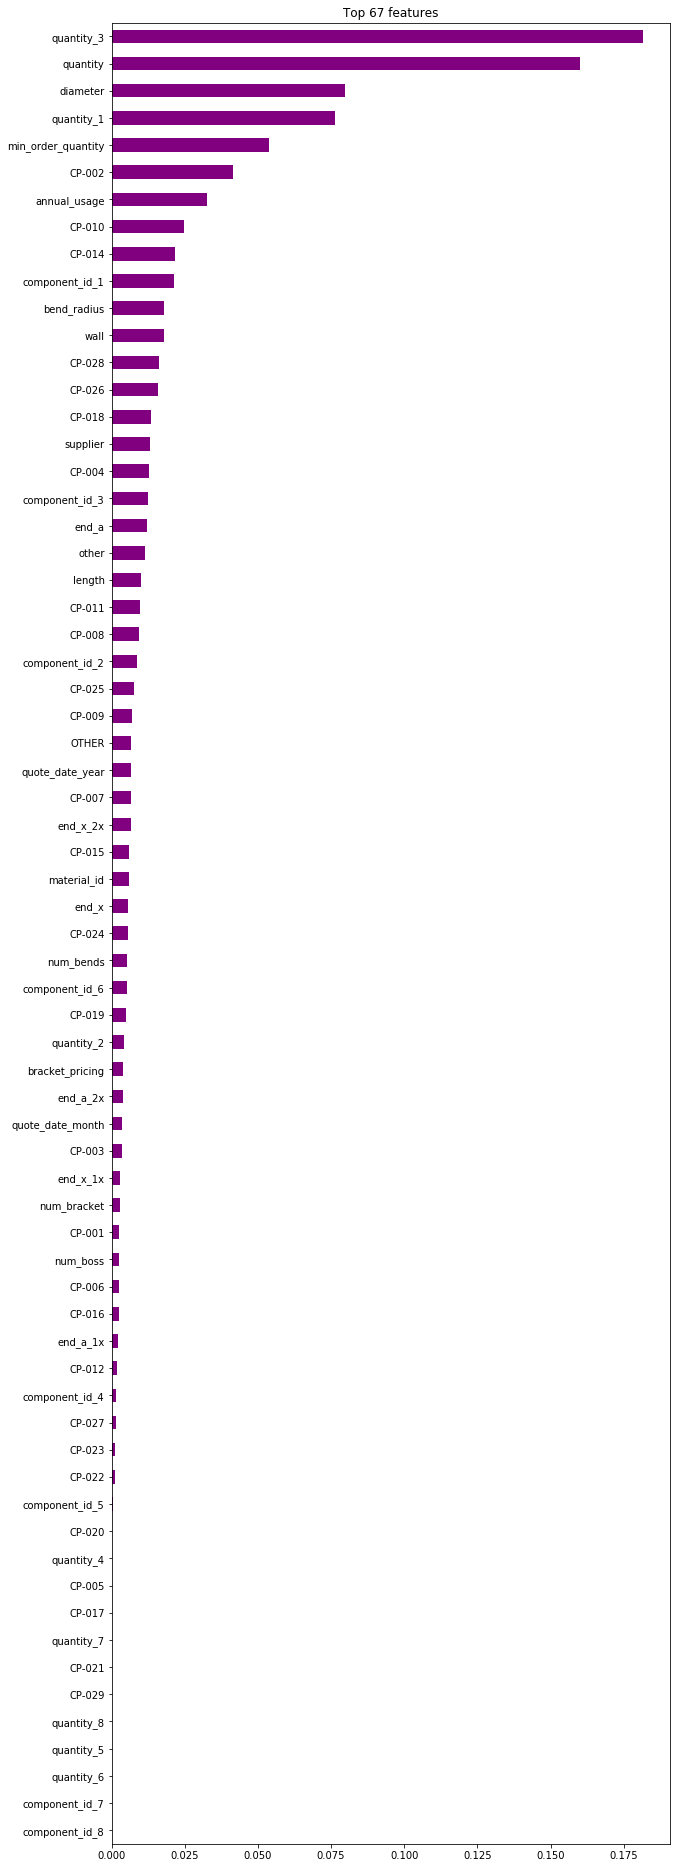

In [32]:
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, X_train_encoded.columns)

n = len(X_train_encoded.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='purple');

In [33]:
%%time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

column  = 'annual_usage'
model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded.drop(columns=column), y_train_log)
y_pred_log = model.predict(X_val_encoded.drop(columns=column))
score_without = rmse(y_val_log, y_pred_log)
print(f'Validation RMSLE without {column}:', score_without)

model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log)
y_pred_log = model.predict(X_val_encoded)
score_with = rmse(y_val_log, y_pred_log)
print(f'Validation RMSLE with {column}:', score_with)

print(f'Drop-Column Importance for {column}:', score_without - score_with)

[15:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation RMSLE without annual_usage: 0.30642654787743945
[15:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation RMSLE with annual_usage: 0.2603300151653171
Drop-Column Importance for annual_usage: 0.04609653271212233
CPU times: user 1min 53s, sys: 185 ms, total: 1min 53s
Wall time: 57.2 s


In [0]:
feature = 'quantity'
x_val_permuted = X_val_encoded.copy()
x_val_permuted[feature] = np.random.permutation(X_val_encoded[feature])

In [43]:
y_pred_log = model.predict(x_val_permuted)
score_permuted = rmse(y_val_log, y_pred_log)
print(f'Validation RMSLE with {feature}:', score_with)
print(f'Validation RMSLE with {feature} permuted:', score_permuted)
print(f'Permutation Importance:', score_permuted - score_with)

Validation RMSLE with quantity: 0.2603300151653171
Validation RMSLE with quantity permuted: 0.9015478766612582
Permutation Importance: 0.6412178614959412


In [45]:
feature = 'annual_usage'
X_val_permuted = X_val_encoded.copy()
X_val_permuted[feature] = np.random.permutation(X_val_encoded[feature])
y_pred_log = model.predict(x_val_permuted)
score_permuted = rmse(y_val_log, y_pred_log)
print(f'Validation RMSLE with {feature}:', score_with)
print(f'Validation RMSLE with {feature} permuted:', score_permuted)
print(f'Permutation Importance:', score_permuted - score_with)

Validation RMSLE with annual_usage: 0.2603300151653171
Validation RMSLE with annual_usage permuted: 0.9015478766612582
Permutation Importance: 0.6412178614959412


In [46]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_val_encoded, y_val_log)
feature_names = X_val_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.7302 ± 0.0060,quantity
0.2491 ± 0.0053,min_order_quantity
0.0735 ± 0.0041,diameter
0.0646 ± 0.0009,annual_usage
0.0510 ± 0.0045,supplier
0.0300 ± 0.0012,quote_date_year
0.0213 ± 0.0019,length
0.0112 ± 0.0002,wall
0.0103 ± 0.0003,component_id_1
0.0076 ± 0.0003,end_a


In [47]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (22628, 67)


In [48]:
mask = permuter.feature_importances_ > 0
features = X_train.columns[mask]
X_train = X_train[features]
print('Shape after removing features:', X_train.shape)
X_val = X_val[features]

Shape after removing features: (22628, 46)


In [49]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log)
y_pred_log = model.predict(X_val_encoded)
print(f'Validation RMSLE', rmse(y_val_log, y_pred_log))

[15:48:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation RMSLE 0.2566294502479393


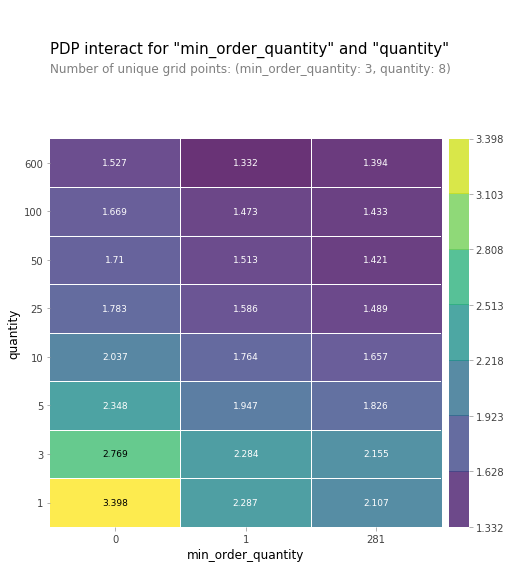

In [64]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['min_order_quantity', 'quantity']

interaction = pdp_interact(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);